## 未来的SPEI

### SPEI<-2.1的树的面积的时间变化趋势

0.3021628058631925
2.0847976245144737e-16
1.113608136974863e-24


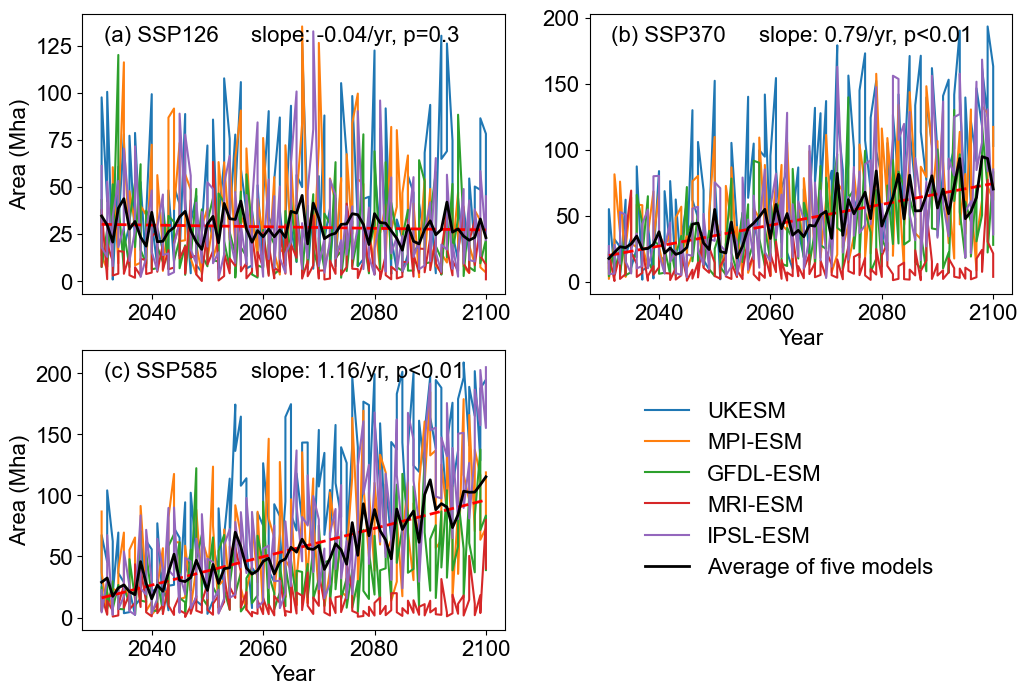

In [142]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy


if __name__ == "__main__":
    workDir = "D:/Documents/outfile"
    os.chdir(workDir)
    data126 = pd.read_csv('ssp126_area_extended_ds_sum_df.csv')
    # 增加一列SSP
    data126['SSP'] = 'ssp126'
    data370 = pd.read_csv('ssp370_area_extended_ds_sum_df.csv')
    data370['SSP'] = 'ssp370'
    data585 = pd.read_csv('ssp585_area_extended_ds_sum_df.csv')
    data585['SSP'] = 'ssp585'

    # 合并数据
    data = pd.concat([data126, data370, data585], ignore_index=True)
    
    # 确保数值列的数据类型为float
    data[['area']] = data[['area']].astype(float)
    
    # 计算每一年，每个ssp的多模型平均结果
    data_mean = data.groupby(['year', 'SSP'])[['area']].mean().reset_index()
    
    # 计算每一年，每个ssp的多模型标准差结果
    data_sd = data.groupby(['year', 'SSP'])[['area']].std().reset_index()
    
    # 合并数据
    data_all = pd.merge(data_mean, data_sd, on=['year', 'SSP'])
    # rename
    data_all.rename(columns={'area_x': 'area'}, inplace=True)
    data_all.rename(columns={'area_y': 'area_sd'}, inplace=True)
    
    # plot
    fig, axes = plt.subplots(2,2,figsize=(12,8))
    ax = axes.flatten()
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 16

    text_list = ['(a) SSP126', '(b) SSP370', '(c) SSP585']
    for i, ssp in enumerate(['ssp126', 'ssp370', 'ssp585']):
        data_ssp = data[data['SSP'] == ssp]
        multi_model_meanssp = data_all[data_all['SSP'] == ssp]
        # 按年份排序
        data_ssp = data_ssp.sort_values(by='year')
        multi_model_meanssp = multi_model_meanssp.sort_values(by='year')
        data_ssp = data_ssp[data_ssp['year'] >= 2031]
        multi_model_meanssp = multi_model_meanssp[multi_model_meanssp['year'] >= 2031]
        
        # 区分不同的模型
        for model in data_ssp['model'].unique():
            data_model = data_ssp[data_ssp['model'] == model]
            model_name = model+"-esm"
            if model == "ukesm":
                model_name= model
                # 改为大写
            model_name = model_name.upper()
            ax[i].plot(data_model['year'], data_model['area']/ 10000 /1000000 /100, label=model_name)
        
        # 拟合多模型平均的趋势
        from scipy.stats import linregress

        slope, intercept, r_value, p_value, std_err = linregress(multi_model_meanssp['year'], multi_model_meanssp['area']/ 1000000 /1000000)
        trend_line = slope * multi_model_meanssp['year'] + intercept
        # text
        if i == 0:
            ax[i].text(0.4, 0.9, f'slope: {slope:.2f}/yr, p=0.3', transform=ax[i].transAxes, fontsize=16, )
        else:
            ax[i].text(0.4, 0.9, f'slope: {slope:.2f}/yr, p<0.01', transform=ax[i].transAxes, fontsize=16, )
        print(p_value)
        ax[i].plot(multi_model_meanssp['year'], trend_line, color='red', linestyle='--', linewidth=2)
        # 绘制多模型平均
        ax[i].plot(multi_model_meanssp['year'], multi_model_meanssp['area']/ 1000000 /1000000, label='Average of five models', color='black', linestyle='-', linewidth=2)
        # 绘制标准差
        # ax[i].fill_between(multi_model_meanssp['year'], multi_model_meanssp['area']/ 1000000 /1000000 - multi_model_meanssp['area_sd']/ 1000000 /1000000, multi_model_meanssp['area']/ 1000000 /1000000 + multi_model_meanssp['area_sd']/ 1000000 /1000000, color='gray', alpha=0.5)
        # text 相对位置
        ax[i].text(0.05, 0.9, text_list[i], transform=ax[i].transAxes, fontsize=16, )
        #ax[i].set_ylim(-0.6, 0.6)
        # xlabel
        if i == 1 or i == 2:
            ax[i].set_xlabel('Year')
        # ylabel
        if i == 0 or i == 2:
            ax[i].set_ylabel('Area (Mha)')

    ax5_bbox  = ax[3].get_position()  # 获取 ax5 在整个 figure 中的位置
    legend_x = (ax5_bbox.x0 + ax5_bbox.x1) / 2  # x 轴中心
    legend_y = (ax5_bbox.y0 + ax5_bbox.y1) / 2  # y 轴中心 
    ax[2].legend(
        loc='center',  # 使图例居中
        bbox_to_anchor=(legend_x-0.01, legend_y),  # 将 legend 放置在 ax[5] 的中心
        bbox_transform=plt.gcf().transFigure,  # 使 bbox_to_anchor 以整个 figure 作为参考
        frameon=False  # 去掉图例边框
    )
    ax[3].axis('off')
  
    plt.savefig('D:/Documents/Fig/future_SPEIn21_TCarea.png', dpi=300)
    plt.show()  

### SPEI<-2.1的总的面积的时间变化趋势

0.2667083487510389
4.4341726575933864e-16
3.534039290752944e-25


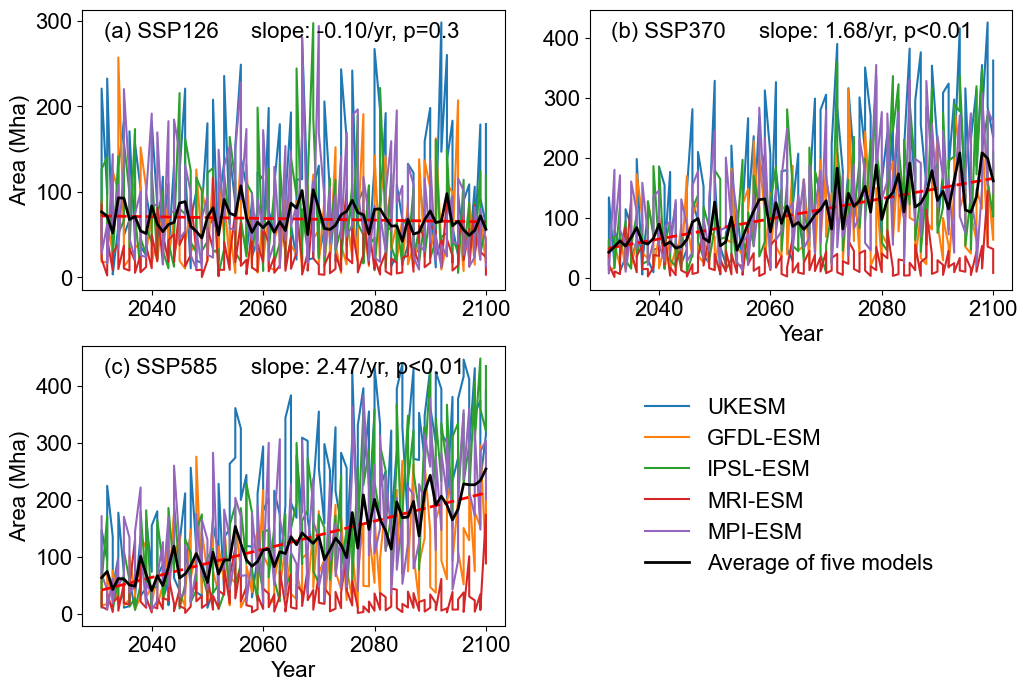

In [141]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy


if __name__ == "__main__":
    workDir = "D:/Documents/outfile"
    os.chdir(workDir)
    data126 = pd.read_csv('ssp126_borealarea_extended_ds_sum_df.csv')
    # 增加一列SSP
    data126['SSP'] = 'ssp126'
    data370 = pd.read_csv('ssp370_borealarea_extended_ds_sum_df.csv')
    data370['SSP'] = 'ssp370'
    data585 = pd.read_csv('ssp585_borealarea_extended_ds_sum_df.csv')
    data585['SSP'] = 'ssp585'

    # 合并数据
    data = pd.concat([data126, data370, data585], ignore_index=True)
    
    # 确保数值列的数据类型为float
    data[['area']] = data[['area']].astype(float)
    
    # 计算每一年，每个ssp的多模型平均结果
    data_mean = data.groupby(['year', 'SSP'])[['area']].mean().reset_index()
    
    # 计算每一年，每个ssp的多模型标准差结果
    data_sd = data.groupby(['year', 'SSP'])[['area']].std().reset_index()
    
    # 合并数据
    data_all = pd.merge(data_mean, data_sd, on=['year', 'SSP'])
    # rename
    data_all.rename(columns={'area_x': 'area'}, inplace=True)
    data_all.rename(columns={'area_y': 'area_sd'}, inplace=True)
    
    # plot
    fig, axes = plt.subplots(2,2,figsize=(12,8))
    ax = axes.flatten()
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.size'] = 16

    text_list = ['(a) SSP126', '(b) SSP370', '(c) SSP585']
    for i, ssp in enumerate(['ssp126', 'ssp370', 'ssp585']):
        data_ssp = data[data['SSP'] == ssp]
        multi_model_meanssp = data_all[data_all['SSP'] == ssp]
        # 按年份排序
        data_ssp = data_ssp.sort_values(by='year')
        multi_model_meanssp = multi_model_meanssp.sort_values(by='year')
        data_ssp = data_ssp[data_ssp['year'] >= 2031]
        multi_model_meanssp = multi_model_meanssp[multi_model_meanssp['year'] >= 2031]
        
        # 区分不同的模型
        for model in data_ssp['model'].unique():
            data_model = data_ssp[data_ssp['model'] == model]
            model_name = model+"-esm"
            if model == "ukesm":
                model_name= model
                # 改为大写
            model_name = model_name.upper()
            ax[i].plot(data_model['year'], data_model['area']/ 10000 /1000000 , label=model_name)
        
        # 拟合多模型平均的趋势
        from scipy.stats import linregress

        slope, intercept, r_value, p_value, std_err = linregress(multi_model_meanssp['year'], multi_model_meanssp['area']/ 10000 /1000000)
        trend_line = slope * multi_model_meanssp['year'] + intercept
        # text
        if i == 0:
            ax[i].text(0.4, 0.9, f'slope: {slope:.2f}/yr, p=0.3', transform=ax[i].transAxes, fontsize=16, )
        else:
            ax[i].text(0.4, 0.9, f'slope: {slope:.2f}/yr, p<0.01', transform=ax[i].transAxes, fontsize=16, )
        print(p_value)
        ax[i].plot(multi_model_meanssp['year'], trend_line, color='red', linestyle='--', linewidth=2)
        # 绘制多模型平均
        ax[i].plot(multi_model_meanssp['year'], multi_model_meanssp['area']/ 10000 /1000000, label='Average of five models', color='black', linestyle='-', linewidth=2)
        # 绘制标准差
        # ax[i].fill_between(multi_model_meanssp['year'], multi_model_meanssp['area']/ 1000000 /1000000 - multi_model_meanssp['area_sd']/ 1000000 /1000000, multi_model_meanssp['area']/ 1000000 /1000000 + multi_model_meanssp['area_sd']/ 1000000 /1000000, color='gray', alpha=0.5)
        # text 相对位置
        ax[i].text(0.05, 0.9, text_list[i], transform=ax[i].transAxes, fontsize=16, )
        #ax[i].set_ylim(-0.6, 0.6)
        # xlabel
        if i == 1 or i == 2:
            ax[i].set_xlabel('Year')
        # ylabel
        if i == 0 or i == 2:
            ax[i].set_ylabel('Area (Mha)')

    ax5_bbox  = ax[3].get_position()  # 获取 ax5 在整个 figure 中的位置
    legend_x = (ax5_bbox.x0 + ax5_bbox.x1) / 2  # x 轴中心
    legend_y = (ax5_bbox.y0 + ax5_bbox.y1) / 2  # y 轴中心 
    ax[2].legend(
        loc='center',  # 使图例居中
        bbox_to_anchor=(legend_x-0.01, legend_y),  # 将 legend 放置在 ax[5] 的中心
        bbox_transform=plt.gcf().transFigure,  # 使 bbox_to_anchor 以整个 figure 作为参考
        frameon=False  # 去掉图例边框
    )
    ax[3].axis('off')
  
    plt.savefig('D:/Documents/Fig/future_SPEIn21_borealarea.png', dpi=300)
    plt.show()  

# SPEI的时间趋势

#### 分ssp绘制

ssp126
ssp370
ssp585


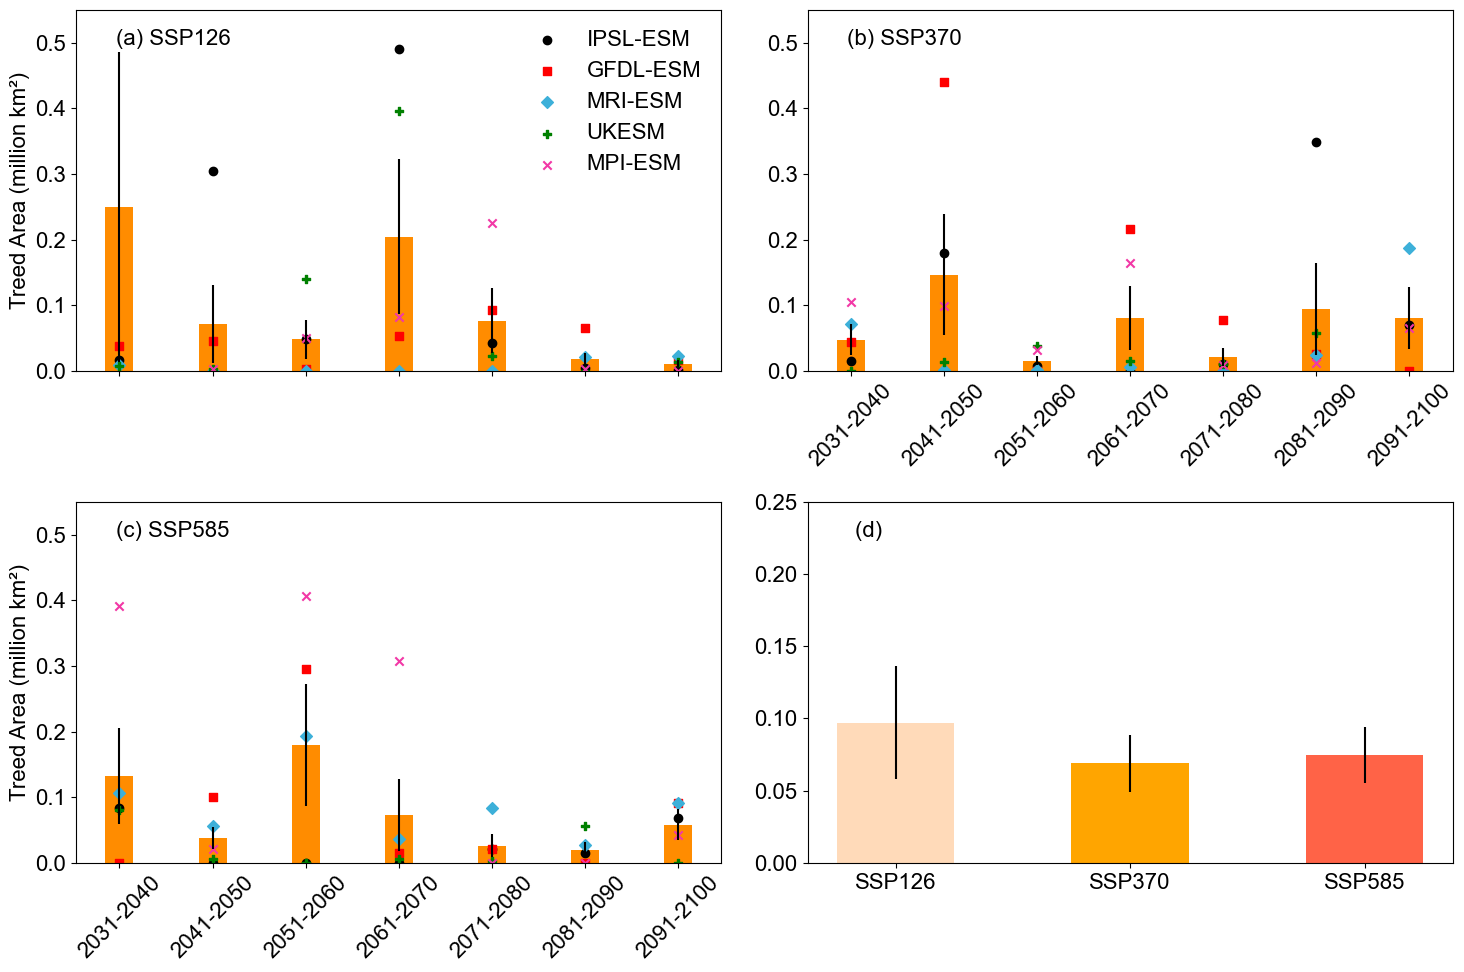

In [179]:
if __name__ == "__main__":
    workDir = "D:/Documents/outfile/"
    os.chdir(workDir)

    scenarioList = ["ssp126", "ssp370", "ssp585"]
    modelList = ["ipsl", "gfdl", "mri", "ukesm", "mpi"]
    model_label_list = ["IPSL-ESM", "GFDL-ESM", "MRI-ESM", "UKESM", "MPI-ESM"]
    model_point_type = ["o", "s", "D", "P", "x"]
    marker_color = ["black", "red", "#3DB0D9", "green", "#F238A6"]
    periodList = [2031, 2041, 2051, 2061, 2071, 2081, 2091]
    LabelList = ["2031-2040", "2041-2050", "2051-2060", "2061-2070", "2071-2080", "2081-2090", "2091-2100"]
    text_lable_list = ["(a) SSP126", "(b) SSP370", "(c) SSP585"]
   

    out_bar_df = pd.DataFrame()
    out_point_df = pd.DataFrame()
    out_bar_period_list = []
    out_bar_mean_list = []
    out_bar_se_list = []
    out_bar_scenario_list = []

    out_point_period_list = []
    out_point_mean_list = []
    out_point_scenario_list = []
    out_point_model_list = []

    for scenario in scenarioList:
        fn = scenario + '_area_extended_ds_sum_df.csv'
        df = pd.read_csv(fn)
        df = df[df["threshold"] == "n21"]
        df["area"] = df["area"]/1000000 / 1000000 # Convert m2 to million km2
        for period in periodList:
            df_period = df[df["year"].isin(range(period, period+10))]
            # 计算面积的平均值
            period_mean_area_multimodel = df_period["area"].mean()
            # 计算面积的标准差
            period_sd_area_multimodel = df_period["area"].std()
            period_se_area_multimodel = period_sd_area_multimodel/np.sqrt(len(df_period))
            out_bar_period_list.append(period)
            out_bar_mean_list.append(period_mean_area_multimodel)
            out_bar_se_list.append(period_se_area_multimodel)
            out_bar_scenario_list.append(scenario)
    
            for model in modelList:
                df_period_model = df_period[df_period["model"] == model]
                period_mean_area_single_model = df_period_model["area"].mean()
                out_point_period_list.append(period)
                out_point_mean_list.append(period_mean_area_single_model)
                out_point_scenario_list.append(scenario)
                out_point_model_list.append(model)
    
    # 合成为dataframe
    out_bar_df = pd.DataFrame({
        "period": out_bar_period_list,
        "mean": out_bar_mean_list,
        "se": out_bar_se_list,
        "scenario": out_bar_scenario_list
    })
    
    out_point_df = pd.DataFrame({
        "period": out_point_period_list,
        "mean": out_point_mean_list,
        "scenario": out_point_scenario_list,
        "model": out_point_model_list
    })
    
    # 绘制柱状图
    plt.rcParams["font.size"] = 16
    plt.rcParams["font.family"] = "Arial"
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    for scenario in scenarioList:
        print(scenario)
        bar_plot_data = out_bar_df[out_bar_df["scenario"] == scenario]
        axes[scenarioList.index(scenario)].bar(bar_plot_data["period"], bar_plot_data["mean"], yerr=bar_plot_data["se"], color="darkorange", width=3)
        axes[scenarioList.index(scenario)].set_ylim(0, 0.5)
        axes[scenarioList.index(scenario)].set_ylabel("Treed Area (million km²)")

        point_plot_data = out_point_df[out_point_df["scenario"] == scenario]
        # Plot scatter points for each model
        for model in modelList:
            model_data = point_plot_data[point_plot_data["model"] == model]
            axes[scenarioList.index(scenario)].scatter(
                model_data["period"], 
                model_data["mean"],
                c=marker_color[modelList.index(model)],
                marker=model_point_type[modelList.index(model)],
                label=model_label_list[modelList.index(model)]
            )
        # set ylim
        axes[scenarioList.index(scenario)].set_ylim(0, 0.55)
        # text
        axes[scenarioList.index(scenario)].text(0.15, 0.92, text_lable_list[scenarioList.index(scenario)], fontsize=16, ha="center", va="center", transform=axes[scenarioList.index(scenario)].transAxes)
        # xtick label
        axes[scenarioList.index(scenario)].set_xticks(periodList)
        axes[scenarioList.index(scenario)].set_xticklabels(LabelList)
        # 旋转x tick label
        axes[scenarioList.index(scenario)].set_xticklabels(LabelList, rotation=45)
      
    # 删除axes[0]的x tick label
    axes[0].set_xticklabels([])
    # axes[1]ylabel
    axes[1].set_ylabel("")
    # set legend
    axes[0].legend(frameon=False)

    # ax3 绘制柱状图
    box_labels = ["SSP126", "SSP370", "SSP585"]
    colors = ['peachpuff', 'orange', 'tomato']
    mean_area_list = []
    se_area_list = []
    for scenario in scenarioList:
        fn = scenario + '_area_extended_ds_sum_df.csv'
        df = pd.read_csv(fn)
        df = df[df["threshold"] == "n21"]
        df["area"] = df["area"]/1000000 / 1000000 # Convert m2 to million km2
        mean_area_list.append(df["area"].mean())
        se_area_list.append(df["area"].std()/np.sqrt(len(df)))
    # 绘制柱状图
    axes[3].bar(box_labels, mean_area_list, color=colors, yerr=se_area_list, width=0.5)
    axes[3].set_ylim(0, 0.25)
    axes[3].set_ylabel("")
    # text
    axes[3].text(0.1, 0.92, "(d) ", fontsize=16, ha="center", va="center", transform=axes[3].transAxes)
    # 绘制误差线
    plt.tight_layout()

### 单独模型空间

C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\704253180.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_colors = get_cmap("RdYlBu_r")(np.linspace(0.1, 0.95, n_bins - 1))  # 采样 6 个


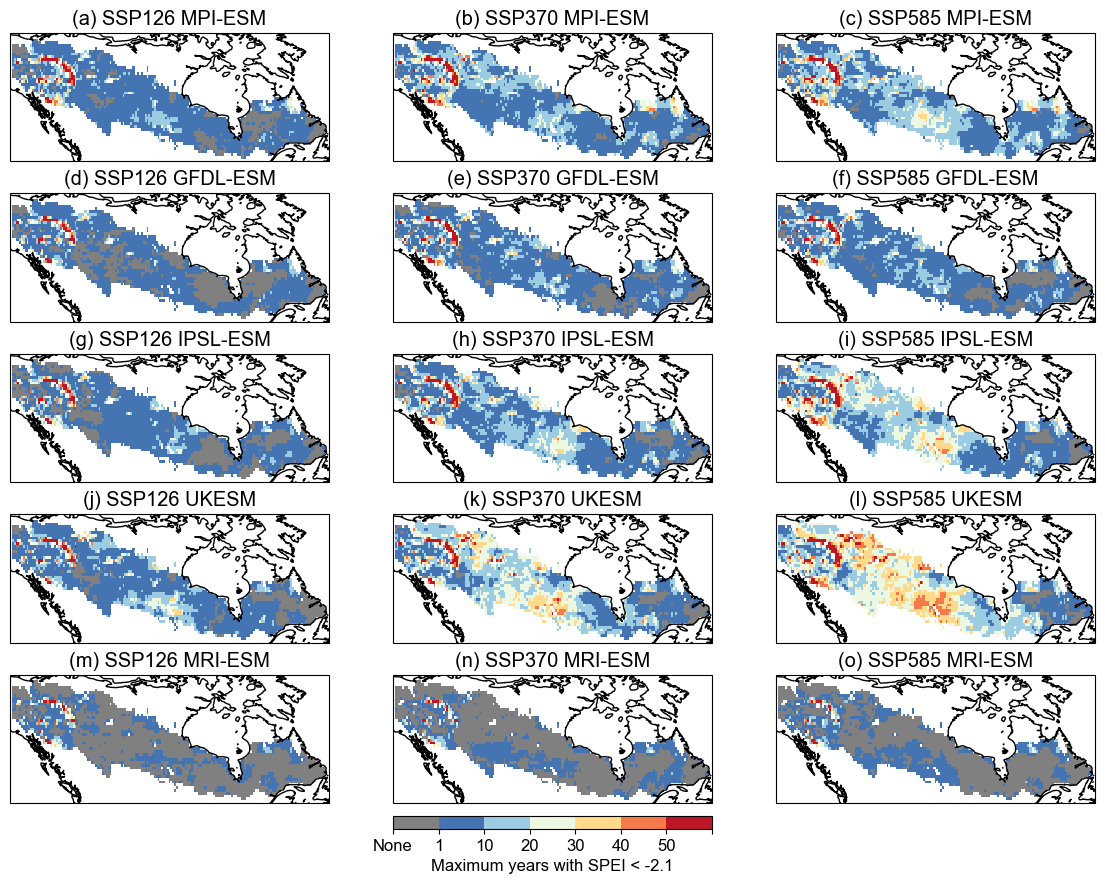

In [5]:
import xarray as xr
import rioxarray as rxr
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

workDir = "D:/ISIMIP/"
os.chdir(workDir)

EBAPath = "D:/Landcover/CA_forest_lead_tree_species/wildfire_clip_05/CA_forest_lead_tree_species_reclass_WGS84_05degree.tif"
EBAda = rxr.open_rasterio(EBAPath).squeeze()
borealPath = "D:/shapfile/spatial_greenup/Boreal_extend_union_05.tif"
borealda = rxr.open_rasterio(borealPath).squeeze()
# rename
EBAda = EBAda.rename({"x": "lon", "y": "lat"})
EBAvalues = EBAda.values
borealda = borealda.rename({"x": "lon", "y": "lat"})
borealvalues = borealda.values

# tree
treePath = "D:/Landcover/CA_forest_lead_tree_species/wildfire_clip_05/CA_forest_lead_tree_species_reclass_WGS84_05degree.tif"
treeda = rxr.open_rasterio(treePath).squeeze()
treeda = treeda.rename({"x": "lon", "y": "lat"})
treevalues = treeda.values
# area
areaPath = "D:/ISIMIP/ssp126_spei/area.nc"
areads = xr.open_dataset(areaPath)
areada = areads["cell_area"]
areavalues = areada.values

scenarioList = ["ssp126", "ssp370", "ssp585"]

plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
fig = plt.figure(figsize=(14, 10))
axes = []

# 设置分类颜色边界: 0~70
bounds = [0, 1, 10, 20, 30, 40, 50, 70]
n_bins = len(bounds) - 1  # 7
cmap_colors = get_cmap("RdYlBu_r")(np.linspace(0.1, 0.95, n_bins - 1))  # 采样 6 个
colors = ["grey"] + list(cmap_colors)  # 1 + 6 = 7
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=n_bins)
# label 0 放在色块中间，其余正常放置
tick_locs = [0, 1, 10, 20, 30, 40, 50, 70]  # 只有第一个 tick 移到中间
tick_labels = ["None", "1", "10", "20", "30", "40", "50", ""]

text_lable_list = ["(a) SSP126", "(b) SSP370", "(c) SSP585"]
box_labels = ["SSP126", "SSP370", "SSP585"]
ID_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(k)", "(l)", "(m)", "(n)", "(o)", "(p)", "(q)", "(r)", "(s)", "(t)", "(u)", "(v)", "(w)", "(x)", "(y)", "(z)"]
modelList = ["mpi", "gfdl", "ipsl", "ukesm", "mri"]
model_label_list = ["MPI-ESM", "GFDL-ESM", "IPSL-ESM", "UKESM", "MRI-ESM"]
area_list = []

num_rows = len(modelList)
num_cols = len(scenarioList)
for scenario in scenarioList:
    for model in modelList:
        speiPath = scenario + "_spei/" + model + "_n21.nc"
        speids = xr.open_dataset(speiPath)
        speida = speids["spei_gamma_03"]
        
        spei_count_gt_0 = speida.where(speida > 0).count(dim="year")
        model_counts.append(spei_count_gt_0)
        
        borealda = borealda.reindex_like(spei_count_gt_0, method="nearest")
        EBAda = EBAda.reindex_like(spei_count_gt_0, method="nearest")
        treeda = treeda.reindex_like(spei_count_gt_0, method="nearest")
        
        masked_years = spei_count_gt_0.where(borealda > 0)
        masked_years = masked_years.where(EBAda > 0.05)

        # ✅ subplot index：行是 model，列是 scenario
        row = modelList.index(model)
        col = scenarioList.index(scenario)
        subplot_index = row * num_cols + col + 1

        ax = fig.add_subplot(num_rows, num_cols, subplot_index, projection=ccrs.PlateCarree())
        axes.append(ax)
        ax.set_aspect("auto") 
        ax.add_feature(cfeature.COASTLINE)

        img = masked_years.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
        ax.set_title(ID_labels[subplot_index - 1] + " " + box_labels[scenarioList.index(scenario)] + " " + model_label_list[modelList.index(model)])
    
    

        if scenarioList.index(scenario) == 1 and modelList.index(model) == 4:         # 不显示坐标轴内容

            # 创建一个居中的 colorbar 区域（相对 axes[3]）
            cax = inset_axes(
                    ax,
                    width="100%",      # 或者 0.03
                    height="10%",    # 或者 0.6
                    loc='lower left',
                    bbox_to_anchor=(0, -0.2, 1, 1),  # 这里的 (x, y, w, h)
                    bbox_transform=ax.transAxes,
                    borderpad=0
                )

            cbar = plt.colorbar(
                img,
                cax=cax,
                orientation="horizontal",
                boundaries=bounds,
                ticks=tick_locs
            )
            cbar.set_label("Maximum years with SPEI < -2.1")
            cbar.set_ticklabels(tick_labels)

# 子图间隔
# plt.tight_layout()
plt.subplots_adjust( hspace=0.25)
plt.savefig("D:/Documents/Fig/future_spei_area_single_model.png", dpi=600)
plt.show()


## 多模型整合绘图1

<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:200: SyntaxWarning: invalid escape sequence '\p'
<>:198: SyntaxWarning: invalid escape sequence '\p'
<>:200: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\4253647167.py:198: SyntaxWarning: invalid escape sequence '\p'
  ax.text(0.6, 0.9-i*0.08, (f'{slope*10:.2f} $\pm$ {std_err*10:.2f}'), transform=ax.transAxes, color=color_dict[ssp], fontsize=14)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\4253647167.py:200: SyntaxWarning: invalid escape sequence '\p'
  ax.text(0.6, 0.9-i*0.08, (f'{slope*10:.2f} $\pm$ {std_err*10:.2f} *'), transform=ax.transAxes, color=color_dict[ssp], fontsize=14)


<xarray.DataArray (lat: 230, lon: 865)> Size: 199kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
  * lon          (lon) float64 7kB -141.5 -141.4 -141.3 ... -55.25 -55.15 -55.05
  * lat          (lat) float64 2kB 47.05 47.15 47.25 47.35 ... 69.75 69.85 69.95
    band         int32 4B 1
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         0.39450113093742
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.48874450307489
    _FillValue:              3
    scale_factor:            1.0
    add_offset:              0.0
<xarray.Dataset> Size: 118MB
Dimensions:        (year: 74, lat: 230, lon: 865)
Coordinates:
  * lon            (lon) float64 7kB -141.5 -141

C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\4253647167.py:257: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_colors = get_cmap("RdYlBu_r")(np.linspace(0.1, 0.95, n_bins - 1))  # 采样 6 个


masked_max_years in sspssp126 is  <xarray.DataArray 'spei_gamma_03' ()> Size: 8B
array(70.)
Coordinates:
    band         int64 8B 1
    spatial_ref  int64 8B 0
masked_max_years in sspssp370 is  <xarray.DataArray 'spei_gamma_03' ()> Size: 8B
array(70.)
Coordinates:
    band         int64 8B 1
    spatial_ref  int64 8B 0
masked_max_years in sspssp585 is  <xarray.DataArray 'spei_gamma_03' ()> Size: 8B
array(70.)
Coordinates:
    band         int64 8B 1
    spatial_ref  int64 8B 0
3.737848937055731
7.061650735840048
7.44356821802956


C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\4253647167.py:440: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "scenario", y = "area_percent", data=outdf, palette=violin_color_list, ax=ax_violin)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_84176\4253647167.py:442: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_violin.set_xticklabels(["SSP126", "SSP370", "SSP585"])


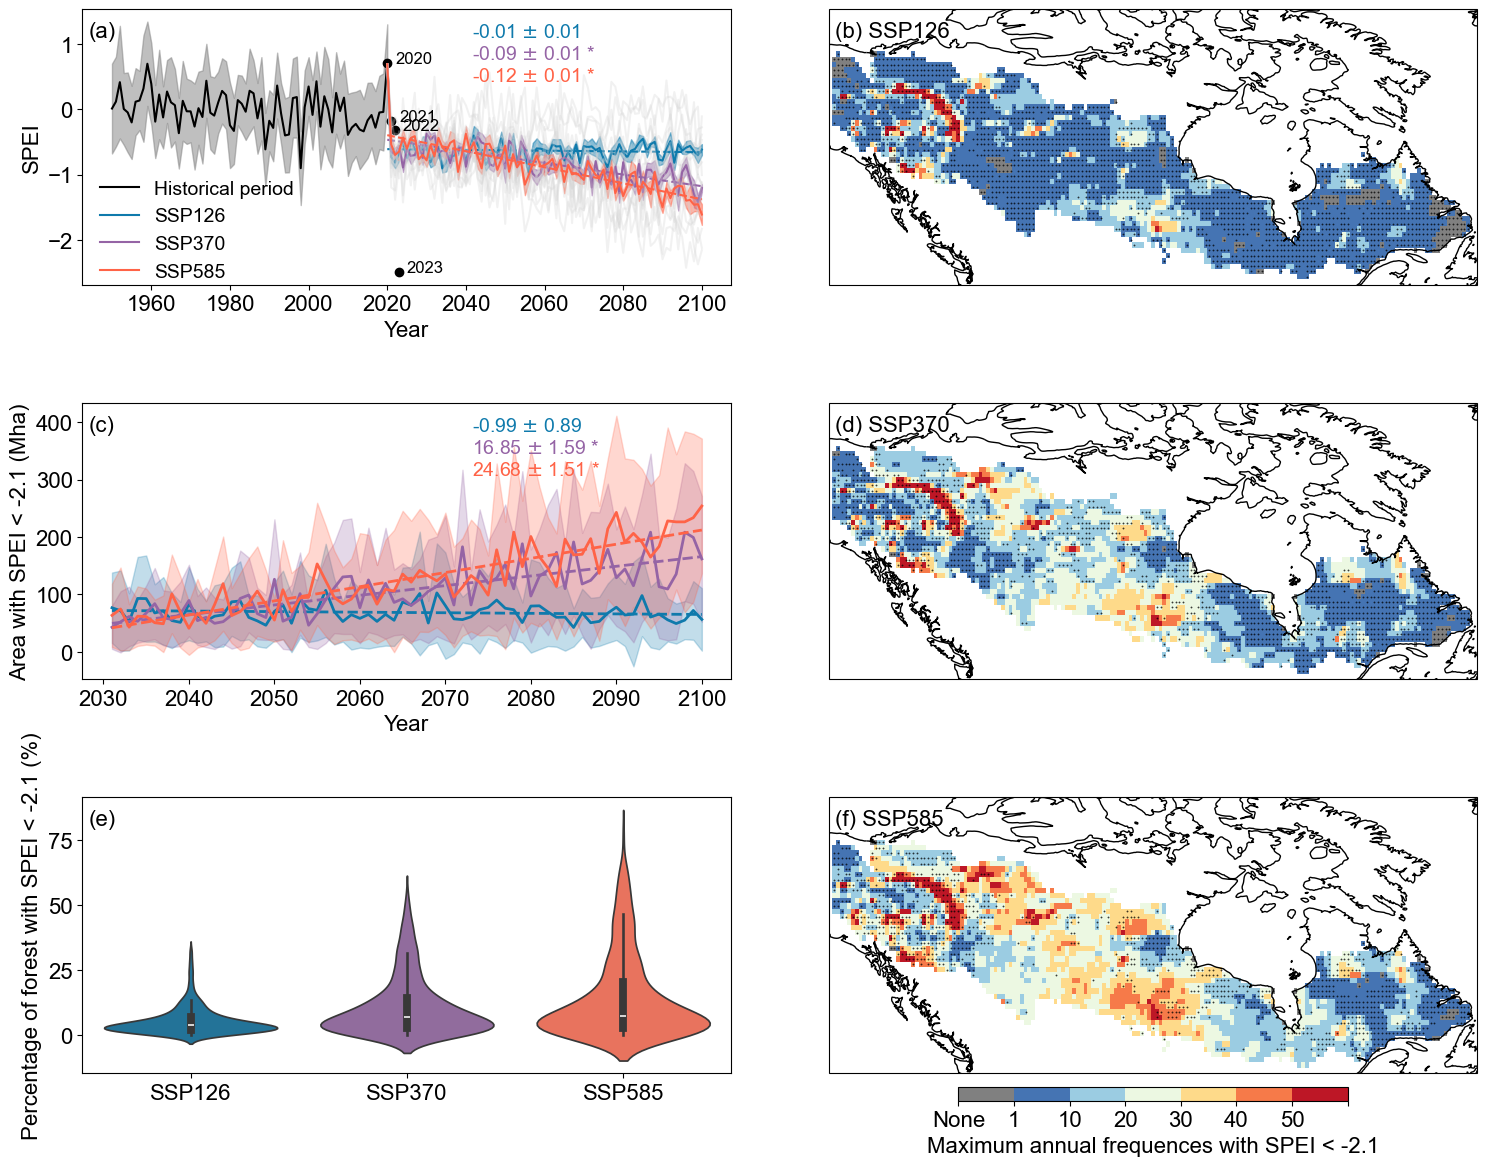

In [ ]:
import pandas as pd
import numpy as np
import os
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
from scipy.stats import linregress

if __name__ == "__main__":
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams['font.size'] = 16
    fig = plt.figure(figsize=(18, 28))
    axes = []

    speiPath = "D:/ERA5/ERA5land_monthly_2000_2023_5eco_extent/spei_pro/calibration_from1950/ERA5land_1950_2023_5eco_spei_gamma_03.nc"
    speida = xr.open_dataset(speiPath)
    # ds = ds.sel(lat=slice(70, 47), lon=slice(-141.5, -55))
    speida = speida.sel(lat=slice(47, 70), lon=slice(-141.5, -55))

    borealda = rxr.open_rasterio("D:/shapfile/spatial_greenup/Boreal_extend_union_01.tif").squeeze()
    borealda = borealda.rename({"x": "lon", "y": "lat"})
    borealvalues = borealda.values

    TCda = rxr.open_rasterio("D:/Landcover/NA_treevocer_5eco_01_degree/treecanopycover_2015_prediction_5eco_WGS84_01.tif").squeeze()
    TCda = TCda.rename({"x": "lon", "y": "lat"})
    TCvalues = TCda.values
    
    # 选取月份在5-10之间的数据
    speida = speida.sel(time=speida.time.dt.month.isin(range(4, 11)))
    # 按年求平均
    speida = speida.groupby('time.year').mean(dim='time')
    borealda = borealda.reindex_like(speida, method="nearest")
    print(borealda)
    print(speida)
    speida = speida.where(borealda > 0)

    TCda = TCda.reindex_like(speida, method="nearest")
    TC_extended = TCda.expand_dims({"year": speida.year})
    TC_values = TC_extended.values
    spei_values = speida.spei_gamma_03.values
    spei_values = np.where(TC_values > 0.1, spei_values, np.nan)

    speida["spei_gamma_03"] = xr.DataArray(spei_values, 
                          dims=["year", "lat", "lon"],
                            coords={"year": speida.year, 
                                    "lat": speida.lat, 
                                    "lon": speida.lon
                                    }
                                    )
    # 计算空间平均
    speida_mean = speida.mean(dim=["lat", "lon"])
    speida_sd = speida.std(dim=["lat", "lon"])

    workDir = "D:/Documents/outfile"
    os.chdir(workDir)
    fn1 = "ISIMIP_SPEI_sta_n21_ssp126.csv"
    fn2 = "ISIMIP_SPEI_sta_n21_ssp370.csv"
    fn3 = "ISIMIP_SPEI_sta_n21_ssp585.csv"

    ssp126df = pd.read_csv(fn1)
    ssp370df = pd.read_csv(fn2)
    ssp585df = pd.read_csv(fn3)

    scenario = ["ssp126", "ssp370", "ssp585"]
    color_dict = {'ssp126': '#0F7AAC', 'ssp370': '#9564A5', 'ssp585': 'tomato'}
    model_list = ["gfdl", "ipsl", "mpi", "mri", "ukesm"]
    model_color_dict = {'ssp126': 'lightgrey', 'ssp370': 'silver', 'ssp585': 'gray'}

    # 合并三个数据集
    df = pd.concat([ssp126df, ssp370df, ssp585df], ignore_index=True)
    df_multimodel_sta = pd.DataFrame()
    for ssp in scenario:
        df_ssp = df[df['ssp_scenario'] == ssp]
        # 按年份分组
        df_ssp_grouped = df_ssp.groupby('year')
        # 计算每个年份的spei_mean和spei_sd
        df_ssp_grouped = df_ssp_grouped.agg({'spei_mean': 'mean', 'spei_sd': 'std'})
        # 添加ssp情景
        df_ssp_grouped['ssp_scenario'] = ssp
        # 添加到df_multimodel_sta
        df_multimodel_sta = pd.concat([df_multimodel_sta, df_ssp_grouped], ignore_index=False)
    # reset index
    df_multimodel_sta = df_multimodel_sta.reset_index()
    future_df_multimodel = df_multimodel_sta[df_multimodel_sta['year'] >= 2020]
    future_df = df[df['year'] >= 2020]
    

    # # 从上一个cell中获取speida_mean和speida_sd
    spei_50_20_mean = speida_mean.sel(year=slice(1950, 2020))
    spei_50_20_sd = speida_sd.sel(year=slice(1950, 2020))

    
    # 子图1 绘制
    ax = fig.add_subplot(3, 2, 1)
    axes.append(ax)
    ax.plot(spei_50_20_mean.year, spei_50_20_mean.spei_gamma_03, label='Historical period',color='black')
    ax.fill_between(spei_50_20_mean.year, spei_50_20_mean.spei_gamma_03 - spei_50_20_sd.spei_gamma_03,
                      spei_50_20_mean.spei_gamma_03 + spei_50_20_sd.spei_gamma_03, alpha=0.5, color='gray')
    # 绘制未来spei，分ssp
    for ssp in scenario:
        for model in model_list:
            future_df_ssp_model = future_df[(future_df['model'] == model) & (future_df['ssp_scenario'] == ssp)]
            ax.plot(future_df_ssp_model.year, future_df_ssp_model.spei_mean, color="lightgray", alpha = 0.3)
        # 多模型平均
        future_df_multimodel_ssp = future_df_multimodel[future_df_multimodel['ssp_scenario'] == ssp]
        # 计算趋势
        slope, intercept, r_value, p_value, std_err = linregress(future_df_multimodel_ssp.year, future_df_multimodel_ssp.spei_mean)
        print(f'{ssp} slope: {slope*10:.2f}')
        print(f'{ssp} std_err: {std_err*10:.2f}')
        print(f'{ssp} p_value: {p_value:.2f}')
        fit_values = slope * future_df_multimodel_ssp.year + intercept
        ax.plot(future_df_multimodel_ssp.year, future_df_multimodel_ssp.spei_mean, color=color_dict[ssp], label=ssp.upper())
        ax.plot(future_df_multimodel_ssp.year, fit_values, color=color_dict[ssp], linestyle='--')
        ax.fill_between(future_df_multimodel_ssp.year, future_df_multimodel_ssp.spei_mean - future_df_multimodel_ssp.spei_sd,
                        future_df_multimodel_ssp.spei_mean + future_df_multimodel_ssp.spei_sd, alpha=0.5, color=color_dict[ssp])
    ax.scatter(2020, speida_mean.sel(year=2020).spei_gamma_03.values, color='black') 
    ax.scatter(2021, speida_mean.sel(year=2021).spei_gamma_03.values, color='black')
    ax.scatter(2022, speida_mean.sel(year=2022).spei_gamma_03.values, color='black')
    ax.scatter(2023, -2.5, color='black')

    ax.text(2020+2, speida_mean.sel(year=2020).spei_gamma_03.values, '2020', color='black', fontsize=12)
    ax.text(2021+2, speida_mean.sel(year=2021).spei_gamma_03.values, '2021', color='black', fontsize=12)
    ax.text(2022+2, speida_mean.sel(year=2022).spei_gamma_03.values, '2022', color='black', fontsize=12)
    ax.text(2023+2, -2.5, '2023', color='black', fontsize=12)
    # text slope
    ax.text(0.6, 0.9, r'-0.01 $\pm$ 0.01', fontsize=14, color='#0F7AAC', transform=ax.transAxes)
    ax.text(0.6, 0.82, r'-0.09 $\pm$ 0.01 *', fontsize=14, color='#9564A5', transform=ax.transAxes)
    ax.text(0.6, 0.74, r'-0.12 $\pm$ 0.01 *', fontsize=14, color='tomato', transform=ax.transAxes)
    ax.set_xlabel('Year')
    ax.set_ylabel("SPEI")

    # legend
    ax.legend(loc='lower left', frameon=False, bbox_to_anchor=(0, -0.05), fontsize=14)
    ax.text(0.01, 0.9, "(a)", transform=ax.transAxes)

    # 子图2 绘制
    workDir = "D:/Documents/outfile"
    os.chdir(workDir)
    data126 = pd.read_csv('ssp126_borealarea_extended_ds_sum_df.csv')
    # 增加一列SSP
    data126['SSP'] = 'ssp126'
    data370 = pd.read_csv('ssp370_borealarea_extended_ds_sum_df.csv')
    data370['SSP'] = 'ssp370'
    data585 = pd.read_csv('ssp585_borealarea_extended_ds_sum_df.csv')
    data585['SSP'] = 'ssp585'
    color_dict = {'ssp126': '#0F7AAC', 'ssp370': '#9564A5', 'ssp585': 'tomato'}

    # 合并数据
    data = pd.concat([data126, data370, data585], ignore_index=True)
    
    # 确保数值列的数据类型为float
    data[['area']] = data[['area']].astype(float)
    
    # 计算每一年，每个ssp的多模型平均结果
    data_mean = data.groupby(['year', 'SSP'])[['area']].mean().reset_index()
    
    # 计算每一年，每个ssp的多模型标准差结果
    data_sd = data.groupby(['year', 'SSP'])[['area']].std().reset_index()
    
    # 合并数据
    data_all = pd.merge(data_mean, data_sd, on=['year', 'SSP'])
    # rename
    data_all.rename(columns={'area_x': 'area'}, inplace=True)
    data_all.rename(columns={'area_y': 'area_sd'}, inplace=True)
    
    # plot
    ax = fig.add_subplot(3, 2, 3)
    axes.append(ax)

    text_list = ['(a) SSP126', '(b) SSP370', '(c) SSP585']
    for i, ssp in enumerate(['ssp126', 'ssp370', 'ssp585']):
        data_ssp = data[data['SSP'] == ssp]
        multi_model_meanssp = data_all[data_all['SSP'] == ssp]
        # 按年份排序
        data_ssp = data_ssp.sort_values(by='year')
        multi_model_meanssp = multi_model_meanssp.sort_values(by='year')
        data_ssp = data_ssp[data_ssp['year'] >= 2031]
        multi_model_meanssp = multi_model_meanssp[multi_model_meanssp['year'] >= 2031]
        
        # 拟合多模型平均的趋势
        slope, intercept, r_value, p_value, std_err = linregress(multi_model_meanssp['year'], multi_model_meanssp['area']/ 10000 /1000000)
        trend_line = slope * multi_model_meanssp['year'] + intercept
        print("ssp: ", ssp)
        print("slope: ", slope)
        print("p_value: ", p_value)
        # text trend and p_value
        if i == 0:
            ax.text(0.6, 0.9-i*0.08, (f'{slope*10:.2f} $\pm$ {std_err*10:.2f}'), transform=ax.transAxes, color=color_dict[ssp], fontsize=14)
        else:
            ax.text(0.6, 0.9-i*0.08, (f'{slope*10:.2f} $\pm$ {std_err*10:.2f} *'), transform=ax.transAxes, color=color_dict[ssp], fontsize=14)
        print(p_value)
        ax.plot(multi_model_meanssp['year'], trend_line, color=color_dict[ssp], linestyle='--', linewidth=2)
        # 绘制多模型平均
        ax.plot(multi_model_meanssp['year'], multi_model_meanssp['area']/ 10000 /1000000, label='Average of five models', color=color_dict[ssp], linestyle='-', linewidth=2)
        # 绘制标准差
        ax.fill_between(multi_model_meanssp['year'], multi_model_meanssp['area']/ 10000 /1000000 - multi_model_meanssp['area_sd']/ 10000 /1000000,
                         multi_model_meanssp['area']/ 10000 /1000000 + multi_model_meanssp['area_sd']/ 10000 /1000000, color=color_dict[ssp], alpha=0.25)
        # text 相对位置
        # ax.text(0.05, 0.9, text_list[i], transform=ax.transAxes, fontsize=16, )
        #ax[i].set_ylim(-0.6, 0.6)
        # xlabel
        if i == 1 or i == 2:
            ax.set_xlabel('Year')
        # ylabel
        if i == 0 or i == 2:
            ax.set_ylabel('Area with SPEI < -2.1 (Mha)')

    ax.text(0.01, 0.9, "(c)", transform=ax.transAxes)


    workDir = "D:/ISIMIP/"
    os.chdir(workDir)

    EBAPath = "D:/Landcover/CA_forest_lead_tree_species/wildfire_clip_05/CA_forest_lead_tree_species_reclass_WGS84_05degree.tif"
    EBAda = rxr.open_rasterio(EBAPath).squeeze()
    borealPath = "D:/shapfile/spatial_greenup/Boreal_extend_union_05.tif"
    borealda = rxr.open_rasterio(borealPath).squeeze()
    # rename
    EBAda = EBAda.rename({"x": "lon", "y": "lat"})
    EBAvalues = EBAda.values
    borealda = borealda.rename({"x": "lon", "y": "lat"})
    borealvalues = borealda.values

    # tree
    treePath = "D:/Landcover/CA_forest_lead_tree_species/wildfire_clip_05/CA_forest_lead_tree_species_reclass_WGS84_05degree.tif"
    treeda = rxr.open_rasterio(treePath).squeeze()
    treeda = treeda.rename({"x": "lon", "y": "lat"})
    treevalues = treeda.values
    # area
    areaPath = "D:/ISIMIP/ssp126_spei/area.nc"
    areads = xr.open_dataset(areaPath)
    areada = areads["cell_area"]
    areavalues = areada.values

    scenarioList = ["ssp126", "ssp370", "ssp585"]
    text_lable_list = ["(b) SSP126", "(d) SSP370", "(f) SSP585"]

    # 设置分类颜色边界: 0~70
    bounds = [0, 1, 10, 20, 30, 40, 50, 70]
    # norm =  mcolors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds) - 1)
    # # 创建colormap
    # colors = ["lightgray", "darkorange", "red"]
    # cmap_colors = get_cmap("RdYlBu_r")(np.linspace(0.1, 0.95, len(bounds) - 1))
    # colors = ["grey"] + list(cmap_colors)
    # cmap = mcolors.ListedColormap(colors)
    n_bins = len(bounds) - 1  # 7
    cmap_colors = get_cmap("RdYlBu_r")(np.linspace(0.1, 0.95, n_bins - 1))  # 采样 6 个
    colors = ["grey"] + list(cmap_colors)  # 1 + 6 = 7
    print("length of colors: ", len(colors))
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=n_bins)
    # label 0 放在色块中间，其余正常放置
    tick_locs = [0, 1, 10, 20, 30, 40, 50, 70]  # 只有第一个 tick 移到中间
    tick_labels = ["None", "1", "10", "20", "30", "40", "50", "70"]

    box_labels = ["SSP126", "SSP370", "SSP585"]
    area_list = []

    for scenario in scenarioList:
        mpiPath = scenario + "_spei/mpi_n21.nc"
        gfdlPath = scenario + "_spei/gfdl_n21.nc"
        ipslPath = scenario + "_spei/ipsl_n21.nc"
        ukesmPath = scenario + "_spei/ukesm_n21.nc"
        mriPath = scenario + "_spei/mri_n21.nc"

        mpids = xr.open_dataset(mpiPath)
        gfdlds = xr.open_dataset(gfdlPath)
        ipslds = xr.open_dataset(ipslPath)
        ukesmds = xr.open_dataset(ukesmPath)
        mrids = xr.open_dataset(mriPath)

        mpida = mpids["spei_gamma_03"]  
        gfdl_da = gfdlds["spei_gamma_03"]
        ipsl_da = ipslds["spei_gamma_03"]
        ukesm_da = ukesmds["spei_gamma_03"]
        mri_da = mrids["spei_gamma_03"]

        # 统计每个网格中不同年份大于0的网格数量
        mpi_count_gt_0 = mpida.where(mpida > 0).count(dim="year")
        gfdl_count_gt_0 = gfdl_da.where(gfdl_da > 0).count(dim="year")
        ipsl_count_gt_0 = ipsl_da.where(ipsl_da > 0).count(dim="year")
        ukesm_count_gt_0 = ukesm_da.where(ukesm_da > 0).count(dim="year")
        mri_count_gt_0 = mri_da.where(mri_da > 0).count(dim="year")

        model_counts  = [
            mpi_count_gt_0,
            gfdl_count_gt_0,
            ipsl_count_gt_0,
            ukesm_count_gt_0,
            mri_count_gt_0
        ]

        model_counts_levels = [
        ]

        for model_count_gt_0 in model_counts:
            model_categories = np.digitize(model_count_gt_0.values, bins=bounds)  # 返回的区间索引
            reclassified_model_count_gt_0 = xr.DataArray(model_categories, coords=model_count_gt_0.coords, dims=model_count_gt_0.dims)
            model_counts_levels.append(reclassified_model_count_gt_0)

        # 1️⃣ 每个网格的最大值（不同模型中每个网格上预测的最大 "大于0 年份数"）
        max_years = xr.concat(model_counts, dim="model").max(dim="model")
        median_years = xr.concat(model_counts, dim="model").median(dim="model")
        # 对齐EBAda
        EBAda = EBAda.reindex_like(max_years, method="nearest")
        borealda = borealda.reindex_like(max_years, method="nearest")
        treeda = treeda.reindex_like(max_years, method="nearest")
        masked_max_years = max_years.where( (borealda > 0))
        masked_median_years = median_years.where( (borealda > 0))
        #masked_max_years = masked_max_years.where(EBAda > 0.05)
        print("masked_max_years in ssp" + scenario + " is ", masked_max_years.max())

        # 2️⃣ 每个网格有多少个模型预测过该网格年份频率区间相同
        # （即 count > 0 的模型数）
        model_positive_counts = xr.concat(model_counts, dim="model")
        n_models_with_gt0 = (model_positive_counts > 10).sum(dim="model")
        masked_n_models_with_gt0 = n_models_with_gt0.where( (borealda > 0))
        #masked_n_models_with_gt0 = masked_n_models_with_gt0.where(EBAda > 0.05)
        # 最大区间
        model_levels = xr.concat(model_counts_levels, dim="model")
        max_model_levels = model_levels.max(dim="model")
        # 统计有多少个模型达到该level
        n_models_with_level = (model_levels == max_model_levels).sum(dim="model")
        masked_n_models_with_level = n_models_with_level.where( (borealda > 0))
        #masked_n_models_with_level = masked_n_models_with_level.where(EBAda > 0.05)

        # 3️⃣ 每个网格的树面积
        masked_mask_years_values = max_years.values
        masked_mask_years_treearea = masked_mask_years_values  * areavalues # * treevalues
        sum_masked_mask_years_treearea = np.nansum(masked_mask_years_treearea)
        area_list.append(sum_masked_mask_years_treearea/1000000/1000000)

        mask_mmodel = masked_n_models_with_level > 1
        # mask_mmodel = mask_mmodel.where(borealda > 0, False, True)
        lat_vals = masked_n_models_with_level["lat"].values
        lon_vals = masked_n_models_with_level["lon"].values

        # 创建网格坐标矩阵
        lon_grid, lat_grid = np.meshgrid(lon_vals, lat_vals)

        # 提取满足条件的坐标点
        lat_points = lat_grid[mask_mmodel.values]
        lon_points = lon_grid[mask_mmodel.values]
        
        # 绘制
        ax = fig.add_subplot(3, 2, scenarioList.index(scenario)*2 + 2, projection=ccrs.PlateCarree())
        axes.append(ax)
        ax.set_aspect("auto") 
        ax.add_feature(cfeature.COASTLINE)

        # 分类绘图
        img = masked_max_years.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
        # ax显示范围
        ax.set_xlim(-141.5, -55)
        ax.set_ylim(47, 73)
        
        if scenarioList.index(scenario) == 2:         # 不显示坐标轴内容
            fig.subplots_adjust(bottom=0.5) 
            # 创建一个居中的 colorbar 区域（相对 axes[3]）
            cax = inset_axes(
                    ax,
                    width="60%",      # 或者 0.03
                    height="5%",    # 或者 0.6
                    loc='lower left',
                    bbox_to_anchor=(0.2, -0.1, 1, 1),  # 这里的 (x, y, w, h)
                    bbox_transform=ax.transAxes,
                    borderpad=0
                )

            cbar = plt.colorbar(
                img,
                cax=cax,
                orientation="horizontal",
                boundaries=bounds,
                ticks=tick_locs
            )
            cbar.set_label("Maximum annual frequences with SPEI < -2.1")
            cbar.set_ticklabels(tick_labels)
            
        ax.scatter(
            lon_points, lat_points,
            s=0.04, color='black', marker='D', transform=ccrs.PlateCarree(),
            label='>1 model predicted >0 years'
        )

        # title
        # ax.set_title(text_lable_list[scenarioList.index(scenario)])
        ax.text(0.01, 0.9, text_lable_list[scenarioList.index(scenario)], transform=ax.transAxes)
        ax.set_title("")

    workDir = "D:/Documents/outfile/"
    os.chdir(workDir)

    scenarioList = ["ssp126", "ssp370", "ssp585"]
    modelList = ["ipsl", "gfdl", "mri", "ukesm", "mpi"]
    model_label_list = ["IPSL-ESM", "GFDL-ESM", "MRI-ESM", "UKESM", "MPI-ESM"]
    model_point_type = ["o", "s", "D", "P", "x"]
    marker_color = ["black", "red", "#3DB0D9", "green", "#F238A6"]
    periodList = [2031, 2041, 2051, 2061, 2071, 2081, 2091]
    LabelList = ["2031-2040", "2041-2050", "2051-2060", "2061-2070", "2071-2080", "2081-2090", "2091-2100"]
    outdf = pd.DataFrame()
    out_mean_ls = []
    out_sd_ls = []
    out_se_ls = []
    out_max_ls = []
    out_min_ls = []

    for scenario in scenarioList:
        fn = f"{scenario}_area_extended_ds_sum_df.csv"
        df = pd.read_csv(fn)
        df = df[df["threshold"] == "n21"]
        df["area"] = df["area"] / 10000 / 1000000 / 100  # Convert m2 to million ha
        df["area_percent"] = df["area"] / 255.9 *100
        df["scenario"] = scenario
        filter_df = df[df["area_percent"] > 0]
        # 只保留BA, scenario
        filter_df = filter_df[["area_percent", "scenario"]]
        print(np.median(filter_df["area_percent"]))
        outdf = pd.concat([outdf, filter_df], axis=0)
        
        
        # Calculate mean, standard deviation, and standard error
        out_mean_ls.append(filter_df["area_percent"].mean())
        out_sd_ls.append(filter_df["area_percent"].std())
        out_se_ls.append(filter_df["area_percent"].std() / np.sqrt(len(filter_df["area_percent"])))

    # 绘制小提琴图
    ax_violin = fig.add_subplot(3, 2, 5) 
    violin_color_list = ['#0F7AAC', '#9564A5', 'tomato']
    sns.violinplot(x = "scenario", y = "area_percent", data=outdf, palette=violin_color_list, ax=ax_violin)
    # set x_label
    ax_violin.set_xticklabels(["SSP126", "SSP370", "SSP585"])
    # x_label 设为空
    ax_violin.set_xlabel("")
    ax_violin.set_ylabel("")
    # add title
    # ax_violin.set_title("(d) Percentage of affected tree area (%)")
    ax_violin.set_ylabel("Percentage of forest with SPEI < -2.1 (%)")
    ax_violin.set_yticks([0, 25, 50, 75])
    axes.append(ax_violin)
    ax_violin.text(0.01, 0.9, "(e)", transform=ax_violin.transAxes)
    
    # plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.43)
    plt.savefig("D:/Documents/Fig/future_plot1.png", dpi=600)
    